### Importing Library

In [1]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pickle
from glob import glob
import matplotlib.pyplot as plt

### Connecting to Kaggle API

In [2]:
from google.colab import files
files.upload() #upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle (4).json
kaggle.json


### Loading Dataset

In [3]:
!kaggle datasets download -d adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal

air-pollution-image-dataset-from-india-and-nepal.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
file_name = ('/content/air-pollution-image-dataset-from-india-and-nepal.zip')
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


### Creating Dataset for CNN

In [5]:
folder1 = os.listdir('/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/a_Good')
images_df_1 = pd.DataFrame({'Filename':[name for name in folder1],'Pollution':"a_Good",'Path':'/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/a_Good/'})
folder2 = os.listdir('/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/b_Moderate')
images_df_2 = pd.DataFrame({'Filename':[name for name in folder2],'Pollution':"b_Moderate",'Path':'/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/b_Moderate/'})
folder3 = os.listdir('/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/c_Unhealthy_for_Sensitive_Groups')
images_df_3 = pd.DataFrame({'Filename':[name for name in folder3],'Pollution':"c_Unhealthy_for_Sensitive_Groups",'Path':'/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/c_Unhealthy_for_Sensitive_Groups/'})
folder4 = os.listdir('/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/d_Unhealthy')
images_df_4 = pd.DataFrame({'Filename':[name for name in folder4],'Pollution':"d_Unhealthy",'Path':'/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/d_Unhealthy/'})
folder5 = os.listdir('/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/e_Very_Unhealthy')
images_df_5 = pd.DataFrame({'Filename':[name for name in folder5],'Pollution':"e_Very_Unhealthy",'Path':'/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/e_Very_Unhealthy/'})
folder6 = os.listdir('/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/f_Severe')
images_df_6 = pd.DataFrame({'Filename':[name for name in folder6],'Pollution':"f_Severe",'Path':'/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/f_Severe/'})

In [6]:
frames = [images_df_1, images_df_2, images_df_3, images_df_4, images_df_5, images_df_6]
image_df = pd.concat(frames)

In [7]:
image_df.head()

,Filename,Pollution,Path
0,MH_Good_2023-03-22-11.00-1-204.jpg,a_Good,/content/Air Pollution Image Dataset/Air Pollu...
1,TN_Good_2023-02-20-08.30-1-15.jpg,a_Good,/content/Air Pollution Image Dataset/Air Pollu...
2,BENGR_Good_2023-02-26-08.30-1-421.jpg,a_Good,/content/Air Pollution Image Dataset/Air Pollu...
3,BENGR_Good_2023-03-17-08.30-1-232.jpg,a_Good,/content/Air Pollution Image Dataset/Air Pollu...
4,TN_Good_2023-02-27-16.30-1-141.jpg,a_Good,/content/Air Pollution Image Dataset/Air Pollu...


### Creating Actual Path Column

In [8]:
Actual_path = image_df['Path'] + image_df['Filename']

In [9]:
df = pd.concat([image_df, Actual_path], axis=1)
df.rename(columns = {0:'Actual_Path'}, inplace = True)

In [10]:
df.head()

,Filename,Pollution,Path,Actual_Path
0,MH_Good_2023-03-22-11.00-1-204.jpg,a_Good,/content/Air Pollution Image Dataset/Air Pollu...,/content/Air Pollution Image Dataset/Air Pollu...
1,TN_Good_2023-02-20-08.30-1-15.jpg,a_Good,/content/Air Pollution Image Dataset/Air Pollu...,/content/Air Pollution Image Dataset/Air Pollu...
2,BENGR_Good_2023-02-26-08.30-1-421.jpg,a_Good,/content/Air Pollution Image Dataset/Air Pollu...,/content/Air Pollution Image Dataset/Air Pollu...
3,BENGR_Good_2023-03-17-08.30-1-232.jpg,a_Good,/content/Air Pollution Image Dataset/Air Pollu...,/content/Air Pollution Image Dataset/Air Pollu...
4,TN_Good_2023-02-27-16.30-1-141.jpg,a_Good,/content/Air Pollution Image Dataset/Air Pollu...,/content/Air Pollution Image Dataset/Air Pollu...


### Encoding Pollution Column

In [11]:
df['Pollution'].value_counts()

c_Unhealthy_for_Sensitive_Groups    2863
d_Unhealthy                         2622
e_Very_Unhealthy                    2194
b_Moderate                          1573
a_Good                              1541
f_Severe                            1447
Name: Pollution, dtype: int64

In [12]:
le = LabelEncoder()
df['Pollution'] = le.fit_transform(image_df['Pollution'])

In [13]:
df['Pollution'].value_counts()

2    2863
3    2622
4    2194
1    1573
0    1541
5    1447
Name: Pollution, dtype: int64

In [14]:
pickle.dump(le, open('/content/drive/MyDrive/Colab Notebooks/Air Pollution Classifier/Pollution_le.pkl','wb'))

In [15]:
df.head()

,Filename,Pollution,Path,Actual_Path
0,MH_Good_2023-03-22-11.00-1-204.jpg,0,/content/Air Pollution Image Dataset/Air Pollu...,/content/Air Pollution Image Dataset/Air Pollu...
1,TN_Good_2023-02-20-08.30-1-15.jpg,0,/content/Air Pollution Image Dataset/Air Pollu...,/content/Air Pollution Image Dataset/Air Pollu...
2,BENGR_Good_2023-02-26-08.30-1-421.jpg,0,/content/Air Pollution Image Dataset/Air Pollu...,/content/Air Pollution Image Dataset/Air Pollu...
3,BENGR_Good_2023-03-17-08.30-1-232.jpg,0,/content/Air Pollution Image Dataset/Air Pollu...,/content/Air Pollution Image Dataset/Air Pollu...
4,TN_Good_2023-02-27-16.30-1-141.jpg,0,/content/Air Pollution Image Dataset/Air Pollu...,/content/Air Pollution Image Dataset/Air Pollu...


### Creating Dataset for CNN Model

In [16]:
import cv2
import numpy as np

def get_X_y(df):
  X_pic = []
  y=[]

  for i , row in df.iterrows():
    picture_path = row['Actual_Path']
    pic = cv2.imread(picture_path)
    pic = pic/255
    X_pic.append(pic)

    output = np.array(row['Pollution'])

    y.append(output)

  X_pic = np.array(X_pic)
  y = np.array(y)

  return (X_pic),y

### Creating Train, Test and Validate Dataset

In [17]:
shuffled_df = df.sample(frac=1)
train_df, val_df, test_df = shuffled_df[:8000], shuffled_df[8000:10000], shuffled_df[10000:]

In [ ]:
X_train,y_train = get_X_y(train_df)
X_val,y_val = get_X_y(val_df)
X_test,y_test = get_X_y(test_df)

In [ ]:
IMAGE_SIZE = [224,224]

### Creating VGG16 Tansfer Learning Model

In [ ]:
vgg16 = VGG16(input_shape = IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg16.layers:
  layer.trainable= False

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(6,activation='softmax')(x)
model = Model(inputs=vgg16.input , outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
cp = ModelCheckpoint('model/',save_best_only = True)

In [ ]:
r = model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          epochs=10,
          callbacks=[cp]
          )

Epoch 1/10
250/250 [==============================] - ETA: 0s - loss: 4.4651 - accuracy: 0.7738

250/250 [==============================] - 56s 172ms/step - loss: 4.4651 - accuracy: 0.7738 - val_loss: 2.7445 - val_accuracy: 0.8725
Epoch 2/10
250/250 [==============================] - ETA: 0s - loss: 0.9325 - accuracy: 0.9360

250/250 [==============================] - 42s 170ms/step - loss: 0.9325 - accuracy: 0.9360 - val_loss: 2.1886 - val_accuracy: 0.9095
Epoch 3/10
250/250 [==============================] - ETA: 0s - loss: 0.6429 - accuracy: 0.9550

250/250 [==============================] - 44s 177ms/step - loss: 0.6429 - accuracy: 0.9550 - val_loss: 1.5473 - val_accuracy: 0.9285
Epoch 4/10
250/250 [==============================] - 43s 171ms/step - loss: 0.3760 - accuracy: 0.9741 - val_loss: 2.0114 - val_accuracy: 0.9305
Epoch 5/10
250/250 [==============================] - 43s 174ms/step - loss: 0.4386 - accuracy: 0.9749 - val_loss: 1.6762 - val_accuracy: 0.9370
Epoch 6/10
250/250 [==============================] - 43s 173ms/step - loss: 0.3541 - accuracy: 0.9764 - val_loss: 2.5509 - val_accuracy: 0.9245
Epoch 7/10
250/250 [==============================] - 41s 165ms/step - loss: 0.3193 - accuracy: 0.9761 - val_loss: 3.1212 - val_accuracy: 0.9135
Epoch 8/10
250/250 [==============================] - 43s 173ms/step - loss: 0.3691 - accuracy: 0.9783 - val_loss: 2.0399 - val_accuracy: 0.9510
Epoch 9/10
250/250 [==============================] - 43s 173ms/step - loss: 0.4073 - accuracy: 0.9822 - val_loss: 1.5981 - val_accuracy: 0.9

### Accuracy Graph

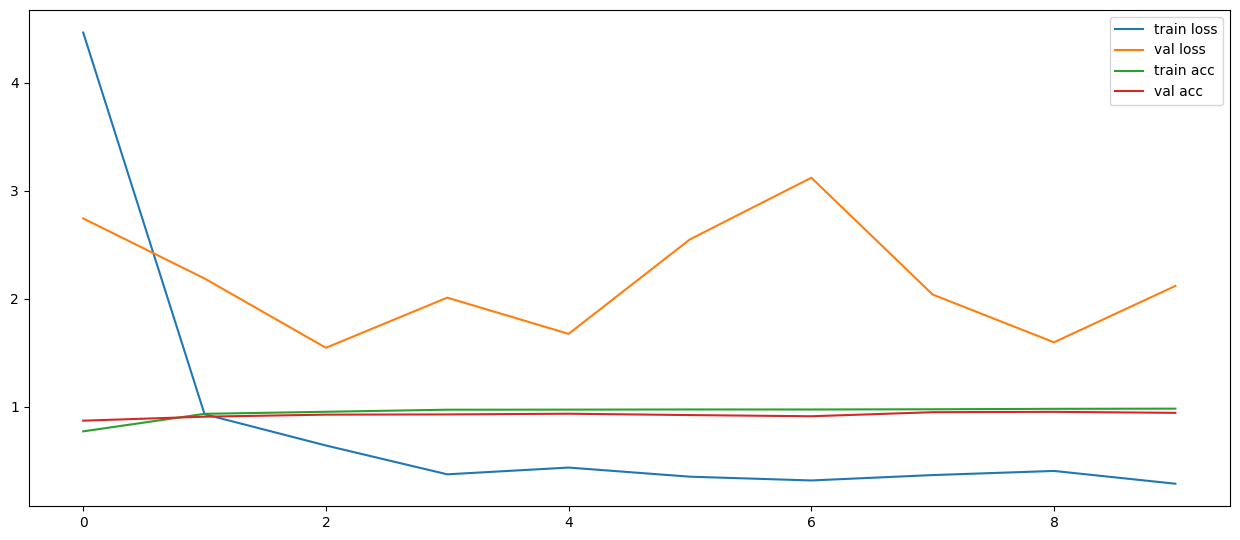

In [ ]:
plt.rcParams["figure.figsize"] = [12.50, 5.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 1)

plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')

plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()

### Saving Model

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/Air Pollution Classifier/VGG16.h5')